In [64]:
import os
import sys
import pandas as pd
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from os import listdir
from os.path import isfile, join
import re
import os
import imageio


In [65]:
import json 
import pandas as pd

def process_json_metrics_to_dataframe(directory_path):
    
    list_json_files = [f for f in listdir(directory_path) if (isfile(join(directory_path, f)) and f.endswith(".json"))]
    data_df = pd.DataFrame()

    if (len(list_json_files)==0):
        print ('No json files in '+directory_path+' returning an empty dataframe.')
    else:

        metrics = []
        date = []
        lat = []
        long = []

        for image_json in list_json_files: 

            try: 
                with open(directory_path+image_json) as f:
                    d = json.load(f)
                    metrics.append(d)
            except:
                print ('Issue with file',image_json)
                continue

        data_df = pd.DataFrame.from_dict(metrics)
        data_df["year"]= data_df["date"].str.slice(0, 4, 1) 
        data_df["year"].astype(int).head()

        data_df.sort_values(by=['date'], inplace=True, ascending=True)


    return data_df  

In [69]:
import os
import imageio

def create_gif_from_images(directory_path, output_name, condition_filename=''):

    file_names = [f for f in listdir(directory_path) if (isfile(join(directory_path, f)) and f.endswith(".png"))]
    
    images = []
    date = []
    for filename in file_names:
        if condition_filename in filename:
            images.append(imageio.imread(directory_path+filename))
            date.append(filename[-14:-4])

    image_dates_df = pd.DataFrame()
    image_dates_df['date'] = date
    image_dates_df['images'] = images

    image_dates_df.sort_values(by=['date'], inplace=True, ascending=True)

    print (image_dates_df.head())
    imageio.mimsave(output_name+'.gif', image_dates_df['images'],duration=1)

In [75]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

import matplotlib.pyplot as plt
import numpy as np


def create_time_evolution_network_figures(data_df, metric, output_dir, output_name):
    
    geometry = [Point(xy) for xy in zip(data_df.longitude, data_df.latitude)]
    data_df['geometry'] = geometry
    
    crs = {'init': 'epsg:4326'}
    data_geo_pd = gpd.GeoDataFrame(data_df, crs=crs, geometry=geometry)
    
    vmin = min(data_df[metric])
    vmax = max(data_df[metric])

    list_of_dates = np.unique(data_geo_pd['date'])

    images = []

    for year in list_of_dates:
    
        # create figure and axes for Matplotlib
        fig, ax = plt.subplots(1, figsize=(6, 6))


        data_geo_pd[data_geo_pd['date']==year].plot(marker='o', ax=ax ,alpha=.5, markersize = 100,column=metric,\
                                                figsize=(10,10), linewidth=0.8, edgecolor='0.8',cmap='Reds')
                                                    
    
    # create an annotation for the  data source
        ax.annotate(str(year),xy=(0.15, 0.08), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=25)
    

        # Create colorbar as a legend
        sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
        sm._A = []
        fig.colorbar(sm)
    
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
        filepath = os.path.join(output_dir, output_name+'_network_values'+year+'.png')
        fig.savefig(filepath, dpi=300)
    
           

In [72]:
create_gif_from_images('/tmp/test_num_points_2years/', 'test_10km','10kmLargeImage')


         date                                             images
3  2016-02-06  [[[255, 255, 255], [255, 255, 255], [255, 255,...
1  2016-04-19  [[[255, 255, 255], [255, 255, 255], [255, 255,...
0  2016-07-01  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
4  2016-09-12  [[[255, 255, 255], [255, 255, 255], [255, 255,...
2  2016-11-24  [[[255, 255, 255], [255, 255, 255], [255, 255,...


          date                                             images
7   2016-01-08  [[[255, 255, 255, 255], [255, 255, 255, 255], ...
6   2016-01-23  [[[255, 255, 255, 255], [255, 255, 255, 255], ...
1   2016-02-07  [[[255, 255, 255, 255], [255, 255, 255, 255], ...
10  2016-02-22  [[[255, 255, 255, 255], [255, 255, 255, 255], ...
2   2016-03-08  [[[255, 255, 255, 255], [255, 255, 255, 255], ...


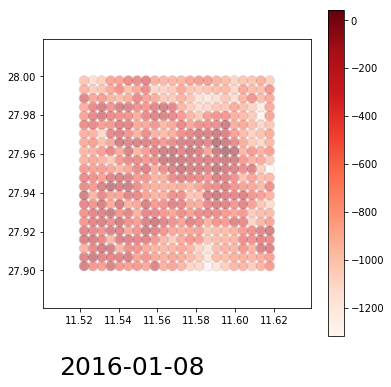

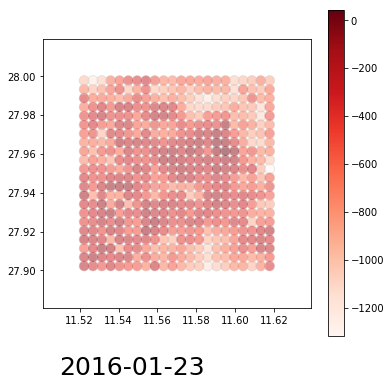

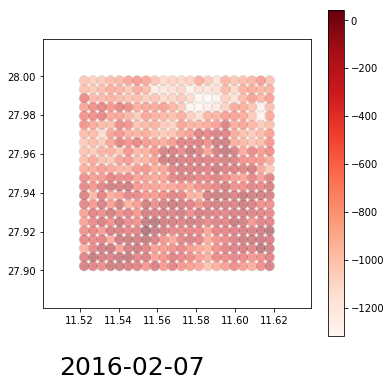

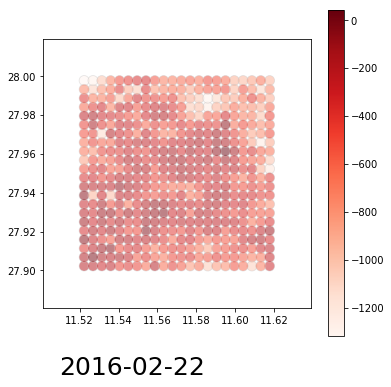

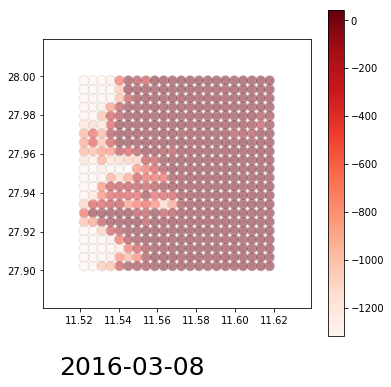

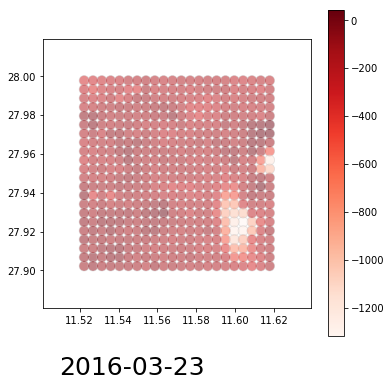

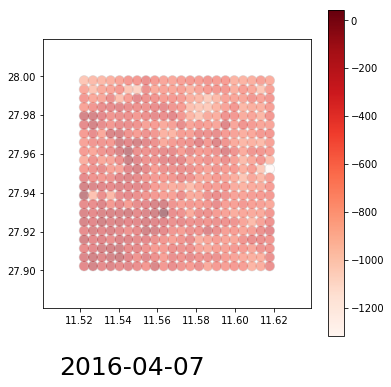

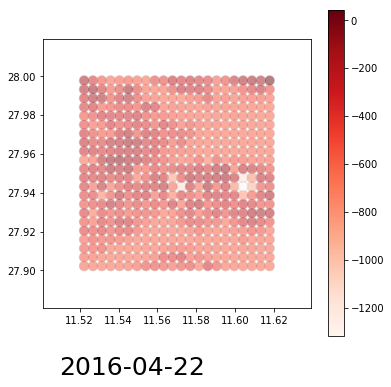

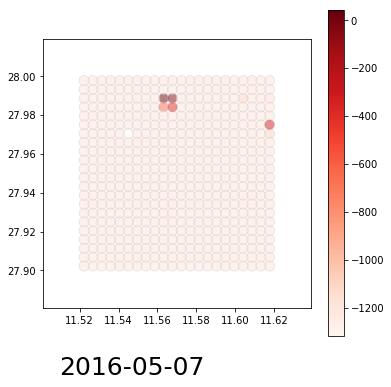

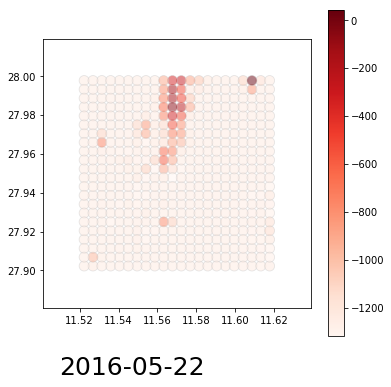

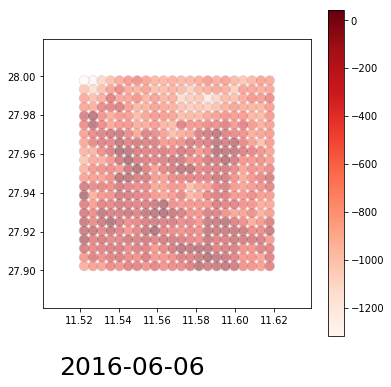

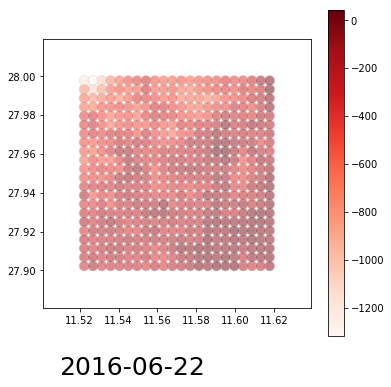

In [76]:
test = process_json_metrics_to_dataframe("../data/network_centrality_2016-01-01_2016-06-30_27.95_11.57_12points/")

create_time_evolution_network_figures(test, 'offset50', '/Users/crangelsmith/PycharmProjects/monitoring-ecosystem-resilience/notebooks/test12points/', 'test12points')

create_gif_from_images('/Users/crangelsmith/PycharmProjects/monitoring-ecosystem-resilience/notebooks/test12points/', 'test12points')


In [57]:
create_gif_from_images('/Users/crangelsmith/PycharmProjects/monitoring-ecosystem-resilience/notebooks/test10km/', 'test10')


         date                                             images
3  2016-02-06  [[[255, 255, 255], [255, 255, 255], [255, 255,...
1  2016-04-19  [[[255, 255, 255], [255, 255, 255], [255, 255,...
0  2016-07-01  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
4  2016-09-12  [[[255, 255, 255], [255, 255, 255], [255, 255,...
2  2016-11-24  [[[255, 255, 255], [255, 255, 255], [255, 255,...


In [51]:

directory_path = "."
file_names = [f for f in listdir(directory_path) if (isfile(join(directory_path, f)) and re.match(r'[0-9]+.*\.png', f))]

a = [f for f in listdir(directory_path) if (isfile(join(directory_path, f)) and f.endswith(".png"))]

print (a)

['test_network_values2016-02-06.png', 'test_network_values2016-07-01.png', 'test_network_values2016-09-12.png', 'test_network_values2016-04-19.png']


In [37]:
crs = {'init': 'epsg:4326'}
data_geo_pd = gpd.GeoDataFrame(data_df, crs=crs, geometry=geometry)

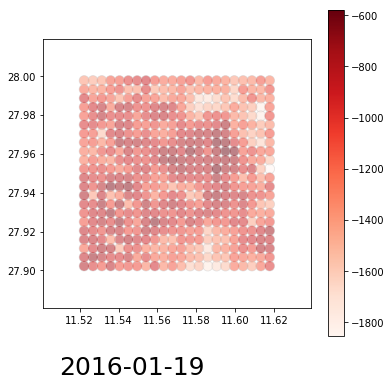

In [38]:
import numpy as np

vmin = min(data_df['offset'])
vmax = max(data_df['offset'])

list_of_years = np.unique(data_geo_pd['date'])
# start the for loop to create one map per year

images = []

for year in list_of_years:
    
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(6, 6))


    data_geo_pd[data_geo_pd['date']==year].plot(marker='o', ax=ax ,alpha=.5, markersize = 100,column='offset',\
                                                figsize=(10,10), linewidth=0.8, edgecolor='0.8',cmap='Reds')
                                                      


    # remove axis of chart
    # fig.axis('off')
    
   
    
    # create an annotation for the  data source
    ax.annotate(str(year),xy=(0.15, 0.08), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=25)
    

    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)
    
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join('', year+'_network_values.jpg')
    fig.savefig(filepath, dpi=300)
    
    images.append(imageio.imread(filepath))
imageio.mimsave('movie_network.gif', images,duration=1)

In [39]:
import os
import imageio


directory_path = "/tmp/test_num_points/"

file_names = [f for f in listdir(directory_path) if (isfile(join(directory_path, f)) and re.match(r'[0-9]+.*\.png', f))]

images = []
date = []
for filename in file_names:
    if "10kmLargeImage" in filename:
        print (filename)
        images.append(imageio.imread(directory_path+filename))
        date.append(filename[-14:-4])

image_dates_df = pd.DataFrame()
image_dates_df['date'] = date
image_dates_df['images'] = images

image_dates_df.sort_values(by=['date'], inplace=True, ascending=True)

imageio.mimsave('movie.gif', image_dates_df['images'],duration=1)

4ae9debd3b12949a9f42368e0f9dedb8_27.950_11.570_10kmLargeImage_2016-02-24.png
2ecea290e1c5f2f6e00330b61edd82f3_27.950_11.570_10kmLargeImage_2016-03-31.png
38a6694db65e290f79b6196d864cb42c_27.950_11.570_10kmLargeImage_2016-05-06.png
9f1b9b5d8b53fbff8392c487ff0c211f_27.950_11.570_10kmLargeImage_2016-11-28.png
7ebc57321b3a11f2c62b15894036521b_27.950_11.570_10kmLargeImage_2016-01-19.png
85cadde22a71f74c5a47b4c221906419_27.950_11.570_10kmLargeImage_2016-06-11.png
3b306ab0f0df7424901c7a538430794b_27.950_11.570_10kmLargeImage_2016-03-31.png


,date,images
4,2016-01-19,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
0,2016-02-24,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,2016-03-31,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
6,2016-03-31,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,2016-05-06,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
5,2016-06-11,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,2016-11-28,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
